In [1]:
from pathlib import Path
from glob import glob
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

In [2]:
#Setting up working directory
if os.path.basename(os.getcwd()) != "Ships_DetectionRT":
    working_dir = str(Path(os.getcwd()).parent)
    
if os.path.exists(working_dir):
    os.chdir(working_dir)
    print("pwd: " + working_dir)
else:
    assert("Desired working directory doesn't exist")
    

pwd: /home/corcasta/Ships_DetectionRT


In [3]:
#Loading trained weights
weights = sorted(glob(os.path.join(working_dir, 
                                   "training", 
                                   "runs", 
                                   "detect", 
                                   "train", 
                                   "weights", 
                                   "*.pt")))
best_weights = weights[0]
last_weights = weights[1]

#Loading Test dataset
test_imgs = sorted(glob(os.path.join(working_dir, "SMDataset_YV8", "test", "images", "*")))


#Model Instance
model = YOLO(best_weights)

# Image Demo

In [4]:
#Instead of using "model.predict" use "model.track" generates the same output
#with the addition of a tracking id 
results = model.track(test_imgs[-1], conf=0.40)
for r in results:
    # detection
    r.boxes.xyxy   # box with xyxy format, (N, 4)
    r.boxes.xywh   # box with xywh format, (N, 4)
    r.boxes.xyxyn  # box with xyxy format but normalized, (N, 4)
    r.boxes.xywhn  # box with xywh format but normalized, (N, 4)
    r.boxes.conf   # confidence score, (N, 1)
    r.boxes.cls    # cls, (N, 1)
    #r.boxes.id    #Only if tracker used

Ultralytics YOLOv8.0.46 🚀 Python-3.9.16 torch-1.13.1+cu117 CPU
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /home/corcasta/Ships_DetectionRT/SMDataset_YV8/test/images/MVI_1646_VIS_frame85_jpg.rf.b05aa15498796bcbe7788b459afff2ed.jpg: 640x640 8 ships, 350.8ms
Speed: 1.0ms preprocess, 350.8ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


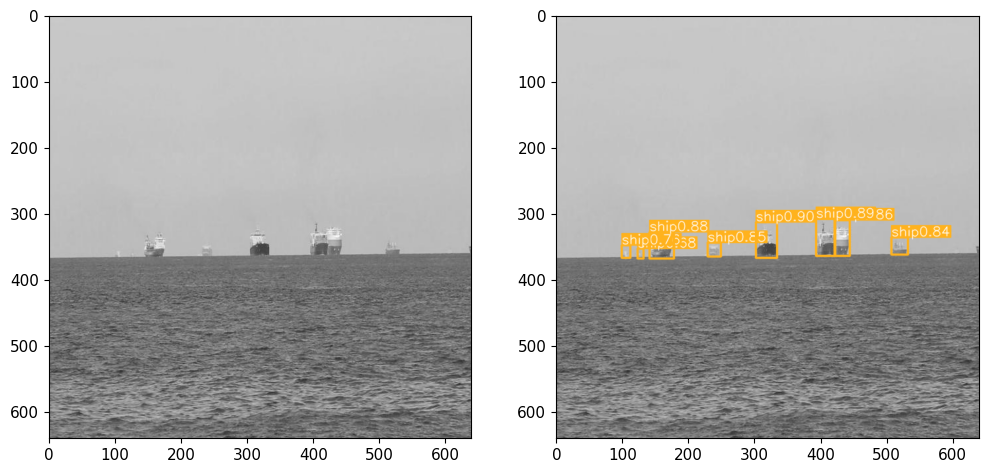

In [5]:
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
img = cv2.imread(test_imgs[-1])
plt.imshow(img[:,:,::-1])


plt.subplot(1, 2, 2)
res_plotted = results[0].plot()
plt.imshow(res_plotted[:,:,::-1], )
plt.show()

# Video DEMO

In [ ]:
video = os.path.join(working_dir, "videos", "singapore_demo.mp4")

In [ ]:
model.predict() #Small bug, we need to call first model.predict before starting tracking
results = model.track(video, show=True)
print(results)